First import all necessairy modules. 

In [1]:
from preprocess import Preprocessor
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.metrics import Accuracy, Precision, Recall
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from message_encoder import *

The we load the data, preprocess it and then split it into Training and Test data. This may take a while. 

In [ ]:
m_encoder = BERTEncoder()

pp = Preprocessor([i for i in range(745, 760)], m_encoder, logs_per_class=100, window_size=20, volatile=True)
train_data, test_data = pp.stratified_split()
X_train, y_train = zip(*train_data)
X_test, y_test = zip(*test_data)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

Now we define the LSTM model, train it and then print a summary.

In [11]:
# Build the model
lstm_layers = 50
epochs = 1000
model = Sequential()
model.add(LSTM(lstm_layers, input_shape=pp.get_shape()))  # 50 units in LSTM layer
num_classes = len(set(y_train))  # Assuming labels are integers
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
# model.fit(X_train, y_train, epochs=epochs, batch_size=32)

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, callbacks=[early_stop])


# Summary of the model
model.summary()

Epoch 1/1000


c:\Users\Askion\Documents\agmge\log-classification\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5587 - loss: 1.1305 - val_accuracy: 0.5312 - val_loss: 1.0954
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6471 - loss: 1.0016 - val_accuracy: 0.5625 - val_loss: 0.9987
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6827 - loss: 0.8932 - val_accuracy: 0.6250 - val_loss: 0.9429
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7313 - loss: 0.8751 - val_accuracy: 0.6250 - val_loss: 0.9088
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7190 - loss: 0.8469 - val_accuracy: 0.6250 - val_loss: 0.8563
Epoch 6/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7771 - loss: 0.7761 - val_accuracy: 0.6875 - val_loss: 0.8097
Epoch 7/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7833 - loss: 0.7765 - val_accuracy: 0.7812 - val_loss: 0.7568
Epoch 8/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8486 - loss: 0.7217 - val_accuracy: 0.7812 - val_loss: 0.71

KeyboardInterrupt: 

In [ ]:
model.save(f"lstm_x{lstm_layers}_{epochs}.h5")

Then we test the model with the test data

loss: 0.0016
compile_metrics: 1.0000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

F1 Score (weighted): 1.0000
[[20192     1     1    31   101  4805 26224 16576   102     0     0     0
      0     0     0     0     0     0     0     0]
 [20192     1     1    23   101  1014  1012  1014  1012  1014  1012  1014
   1024  4749  2683  2683  2683  1011  1028   102]
 [20192     1     1    27   101  2291  1012  5658  1012 27540  1012 22975
  15042  8751  3372   102     0     0     0     0]
 [20192     1     2    25   101  3722 13535 29251  2099  6299  

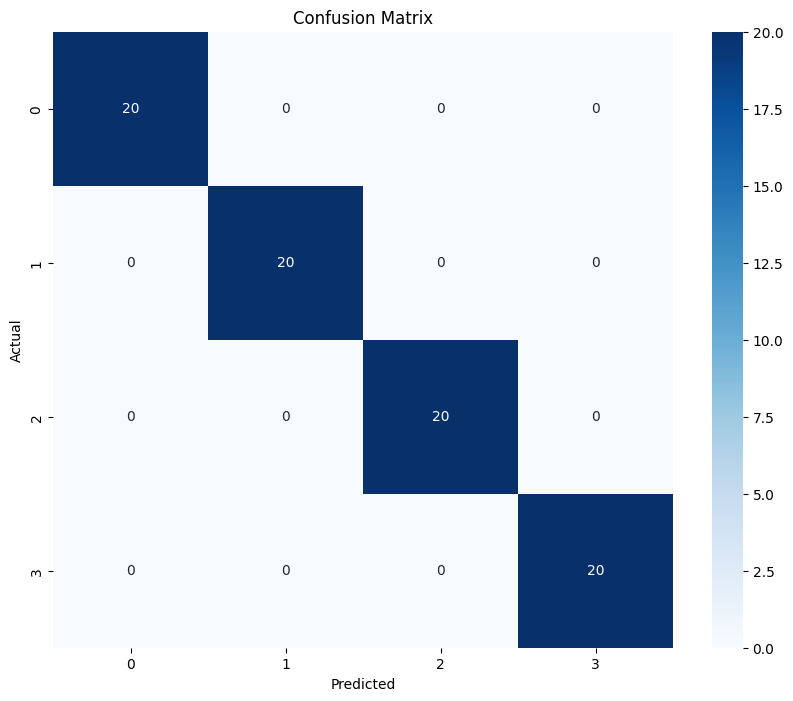

[9.9923110e-01 4.9100191e-07 7.6703989e-04 1.3880625e-06]
[9.9823439e-01 7.1251752e-06 1.7422660e-03 1.6181068e-05]
[1.7530507e-04 3.3279921e-05 2.2119117e-05 9.9976939e-01]
[3.6552451e-06 2.7125343e-04 9.9972421e-01 8.7704888e-07]
[9.9916267e-01 7.7015965e-04 3.5842910e-05 3.1382020e-05]
[1.7631477e-05 8.5676231e-07 9.9997604e-01 5.4804063e-06]
[1.5873009e-04 5.0252656e-05 2.9506144e-05 9.9976152e-01]
[5.9505987e-07 9.9992418e-01 2.3735087e-05 5.1494211e-05]
[1.9478027e-04 3.1365118e-05 9.9977285e-01 1.0850484e-06]
[1.3716231e-04 9.9981481e-01 4.2952430e-05 5.1318507e-06]
[9.9913740e-01 7.2961772e-04 2.4088017e-06 1.3052873e-04]
[1.3654554e-04 3.1823070e-05 1.7551440e-05 9.9981409e-01]
[9.9970919e-01 2.2455645e-04 2.2120359e-05 4.4014585e-05]
[7.7109862e-06 9.9990547e-01 2.0432619e-05 6.6343186e-05]
[9.43091152e-07 9.99807060e-01 9.12177056e-05 1.00784644e-04]
[3.6473625e-06 3.2986488e-04 9.9966538e-01 1.1208185e-06]
[1.1760490e-04 9.9834931e-01 1.4885003e-03 4.4641918e-05]
[9.9989808

In [10]:
# Evaluate the model on test data
results = model.evaluate(X_test, y_test, verbose=0)
for name, value in zip(model.metrics_names, results):
    print(f"{name}: {value:.4f}")

# Predictions
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

# Classification report and F1 score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (weighted): {f1:.4f}")
print(X_test[0])
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print comparison of a few predictions vs actual values
a = []
for i in range(80):
    a.append(y_pred[i] == y_test[i])
    print(predictions[i])

print(a.count(True))